<a href="https://colab.research.google.com/github/Sacrobots/Business_Dealings/blob/main/Income%20Prediction%20based%20on%20Naive_Bayes_Classifier_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project: https://www.kaggle.com/code/prashant111/naive-bayes-classifier-in-python

**Import Libraries**

In [207]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization purposes
import seaborn as sns # for statistical data visualization
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

**Import Dataset**

In [135]:
adult = pd.read_csv('/content/adult.csv')

**Exploratory Data Analysis**

In [136]:
adult.shape

print(f"Number of instances: {adult.shape[0]}")
print(f"Number of attributes: {adult.shape[1]}")

Number of instances: 32560
Number of attributes: 15


**Top 5 rows**

In [137]:
adult.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


**Giving column names**

In [138]:
col_names = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship',
             'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']

adult.columns = col_names

**First 5 rows**

In [139]:
adult.head()

# The columns are renamed

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


**Summary Of Dataset**

In [140]:
adult.info()

# The above response does not have any null values as 32560 is the total instances which are not null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32560 non-null  int64 
 1   workclass       32560 non-null  object
 2   fnlwgt          32560 non-null  int64 
 3   education       32560 non-null  object
 4   education_num   32560 non-null  int64 
 5   marital_status  32560 non-null  object
 6   occupation      32560 non-null  object
 7   relationship    32560 non-null  object
 8   race            32560 non-null  object
 9   sex             32560 non-null  object
 10  capital_gain    32560 non-null  int64 
 11  capital_loss    32560 non-null  int64 
 12  hours_per_week  32560 non-null  int64 
 13  native_country  32560 non-null  object
 14  income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


**First we try to find categorical variables**

In [141]:
categorical = [var for var in adult.columns if adult[var].dtype == 'O']
# Here we are checking for the columns names with string values

print(f'There are {format(len(categorical))} categorical variables')

print(f'The categorical variables are: {categorical}')

There are 9 categorical variables
The categorical variables are: ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']


In [142]:
# view the categorical variables

adult[categorical].head()

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
0,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
1,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
2,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
3,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
4,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,United-States,<=50K


Summary of categorical variables

There are 9 categorical variables:

  The categorical variables are given by workclass, education, marital_status, occupation, relationship, race, sex, native_country and income.

  income is the target variable.

**Missing values in categorical dataset**

In [143]:
adult[categorical].isnull().sum()

# There are no missing values

,0
workclass,0
education,0
marital_status,0
occupation,0
relationship,0
race,0
sex,0
native_country,0
income,0


**Frequency counts**

In [144]:
for var in categorical:
  print(adult[var].value_counts())

workclass
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: count, dtype: int64
education
 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: count, dtype: int64
marital_status
 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: count, dtype: int64
occupation
 Prof-specialty       4140
 Craft-repair 

**Frequency distribution:  Frequency distributions are visual displays that organise and present frequency counts so that the information can be interpreted more easily.**

In [145]:
# view frequency distribution of categorical variables

for var in categorical:

    print(adult[var].value_counts()/len(adult))

workclass
 Private             0.697052
 Self-emp-not-inc    0.078041
 Local-gov           0.064281
 ?                   0.056388
 State-gov           0.039834
 Self-emp-inc        0.034275
 Federal-gov         0.029484
 Without-pay         0.000430
 Never-worked        0.000215
Name: count, dtype: float64
education
 HS-grad         0.322512
 Some-college    0.223925
 Bachelors       0.164435
 Masters         0.052918
 Assoc-voc       0.042445
 11th            0.036087
 Assoc-acdm      0.032770
 10th            0.028655
 7th-8th         0.019840
 Prof-school     0.017690
 9th             0.015786
 12th            0.013299
 Doctorate       0.012684
 5th-6th         0.010227
 1st-4th         0.005160
 Preschool       0.001566
Name: count, dtype: float64
marital_status
 Married-civ-spouse       0.459951
 Never-married            0.328071
 Divorced                 0.136456
 Separated                0.031480
 Widowed                  0.030498
 Married-spouse-absent    0.012838
 Married-AF-s

**Explore workclass variables**

In [146]:
# check labels in workclass variable

adult['workclass'].unique()

# The response shows the different types of strings present in the workclass

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [147]:
adult['workclass'].value_counts()

,count
workclass,
Private,22696
Self-emp-not-inc,2541
Local-gov,2093
?,1836
State-gov,1297
Self-emp-inc,1116
Federal-gov,960
Without-pay,14
Never-worked,7


**Replace '?' Values In Workclass Variable With `NaN`**

In [148]:
adult['workclass'].replace(' ?', np.NaN, inplace=True)

In [149]:
adult['workclass'].value_counts()

# The below response takes NaN into consideration

,count
workclass,
Private,22696
Self-emp-not-inc,2541
Local-gov,2093
State-gov,1297
Self-emp-inc,1116
Federal-gov,960
Without-pay,14
Never-worked,7


**Explore occupation variable**

In [150]:
adult['occupation'].value_counts()

,count
occupation,
Prof-specialty,4140
Craft-repair,4099
Exec-managerial,4066
Adm-clerical,3769
Sales,3650
Other-service,3295
Machine-op-inspct,2002
?,1843
Transport-moving,1597


In [151]:
adult['occupation'].replace(' ?', np.NaN, inplace= True)

In [152]:
adult['occupation'].value_counts()

,count
occupation,
Prof-specialty,4140
Craft-repair,4099
Exec-managerial,4066
Adm-clerical,3769
Sales,3650
Other-service,3295
Machine-op-inspct,2002
Transport-moving,1597
Handlers-cleaners,1370


**Explore Native Country**

In [153]:
adult['native_country'].value_counts()

,count
native_country,
United-States,29169
Mexico,643
?,583
Philippines,198
Germany,137
Canada,121
Puerto-Rico,114
El-Salvador,106
India,100


**Remove ? with np.NaN**

In [154]:
adult['native_country'].replace(' ?', np.NaN, inplace = True)

In [155]:
adult['native_country'].value_counts()

,count
native_country,
United-States,29169
Mexico,643
Philippines,198
Germany,137
Canada,121
Puerto-Rico,114
El-Salvador,106
India,100
Cuba,95


**Checking missing values in categorical variable**

In [156]:
adult[categorical].isnull().sum()

,0
workclass,1836
education,0
marital_status,0
occupation,1843
relationship,0
race,0
sex,0
native_country,583
income,0


**Now, we can see that workclass, occupation and native_country variable contains missing values.**

**Checking for number of labels in categorical variable is known as Cardinality**

In [157]:
for var in categorical:

  print(f'{var} has {len(adult[var].unique())} number of labels')

workclass has 9 number of labels
education has 16 number of labels
marital_status has 7 number of labels
occupation has 15 number of labels
relationship has 6 number of labels
race has 5 number of labels
sex has 2 number of labels
native_country has 42 number of labels
income has 2 number of labels


**Explore Numerical Variables**

In [158]:
numerical = [var for var in adult.columns if adult[var].dtype != 'O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 6 numerical variables

The numerical variables are : ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']


**View Numerical Variables**

In [159]:
adult[numerical].head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,50,83311,13,0,0,13
1,38,215646,9,0,0,40
2,53,234721,7,0,0,40
3,28,338409,13,0,0,40
4,37,284582,14,0,0,40


**Summary of numerical variables**

There are 6 numerical variables.

  These are given by age, fnlwgt, education_num, capital_gain, capital_loss and hours_per_week.

  All of the numerical variables are of discrete data type.

**Missing values in numerical**

In [160]:
adult[numerical].isnull().sum()

,0
age,0
fnlwgt,0
education_num,0
capital_gain,0
capital_loss,0
hours_per_week,0


**Declare feature vector and target variable**

In [161]:
X = adult.drop(['income'], axis = 1)

Y = adult['income']

**Split data into separate training and test set**

In [162]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

**Check the shape of X_train and X_test**

In [163]:
X_train.shape, X_test.shape

((22792, 14), (9768, 14))

**Feature Engineering: Process of transforming raw data into useful features that help us to understand our model better and increase its predictive power.**

In [164]:
X_train.dtypes

,0
age,int64
workclass,object
fnlwgt,int64
education,object
education_num,int64
marital_status,object
occupation,object
relationship,object
race,object
sex,object


In [165]:
# Display categorical variables

categorical = [var for var in X_train.columns if X_train[var].dtypes == 'O']

categorical

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country']

In [166]:
# Display numerical variables

numerical = [var for var in X_train.columns if X_train[var].dtypes != 'O']

numerical

['age',
 'fnlwgt',
 'education_num',
 'capital_gain',
 'capital_loss',
 'hours_per_week']

**Engineering missing values in categorical variables**

In [167]:
# print percentage of missing values in the categorical variables in training set

X_train[categorical].isnull().mean()

,0
workclass,0.057213
education,0.000000
marital_status,0.000000
occupation,0.057389
relationship,0.000000
race,0.000000
sex,0.000000
native_country,0.018252


**Print the columns with missing data**

In [168]:
for col in categorical:
  if X_train[col].isnull().mean() > 0:
    print(col, ' --> ', X_train[col].isnull().mean())

workclass  -->  0.057213057213057215
occupation  -->  0.05738855738855739
native_country  -->  0.018252018252018252


**Impute missing categorical variables with most frequent value**

In [169]:
for df2 in [X_train, X_test]:
  df2['workclass'].fillna(X_train['workclass'].mode()[0], inplace = True)
  df2['occupation'].fillna(X_train['occupation'].mode()[0], inplace = True)
  df2['native_country'].fillna(X_train['native_country'].mode()[0], inplace = True)

**Check missing values in categorical variables in X_test**

In [170]:
X_train[categorical].isnull().sum()

,0
workclass,0
education,0
marital_status,0
occupation,0
relationship,0
race,0
sex,0
native_country,0


**check missing values in categorical variables in X_test**

In [171]:
X_test[categorical].isnull().sum()

,0
workclass,0
education,0
marital_status,0
occupation,0
relationship,0
race,0
sex,0
native_country,0


In [172]:
# check missing values in X_train

X_train.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education_num,0
marital_status,0
occupation,0
relationship,0
race,0
sex,0


In [173]:
# check missing values in X_test

X_test.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education_num,0
marital_status,0
occupation,0
relationship,0
race,0
sex,0


**Encode categorical variables**

In [174]:
categorical

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country']

In [175]:
X_train[categorical].head()

,workclass,education,marital_status,occupation,relationship,race,sex,native_country
20721,Self-emp-inc,Some-college,Married-civ-spouse,Transport-moving,Husband,Black,Male,Haiti
32097,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States
25205,State-gov,HS-grad,Divorced,Adm-clerical,Unmarried,White,Female,United-States
23491,Private,Bachelors,Never-married,Farming-fishing,Not-in-family,White,Male,United-States
12367,Private,Some-college,Never-married,Adm-clerical,Own-child,White,Male,India


**Importing encoders**

In [176]:
!pip install category_encoders

In [177]:
import category_encoders as ce

In [178]:
# encode remaining variables with one-hot encoding

encoder = ce.OneHotEncoder(cols=['workclass', 'education', 'marital_status', 'occupation', 'relationship',
                                 'race', 'sex', 'native_country'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [179]:
X_train.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,fnlwgt,...,native_country_32,native_country_33,native_country_34,native_country_35,native_country_36,native_country_37,native_country_38,native_country_39,native_country_40,native_country_41
20721,32,1,0,0,0,0,0,0,0,343872,...,0,0,0,0,0,0,0,0,0,0
32097,45,0,1,0,0,0,0,0,0,170871,...,0,0,0,0,0,0,0,0,0,0
25205,47,0,0,1,0,0,0,0,0,108890,...,0,0,0,0,0,0,0,0,0,0
23491,37,0,1,0,0,0,0,0,0,61778,...,0,0,0,0,0,0,0,0,0,0
12367,24,0,1,0,0,0,0,0,0,108495,...,0,0,0,0,0,0,0,0,0,0


In [180]:
X_train.shape

(22792, 105)

In [181]:
X_test.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,fnlwgt,...,native_country_32,native_country_33,native_country_34,native_country_35,native_country_36,native_country_37,native_country_38,native_country_39,native_country_40,native_country_41
22278,40,1,0,0,0,0,0,0,0,193524,...,0,0,0,0,0,0,0,0,0,0
8950,46,0,1,0,0,0,0,0,0,188027,...,0,0,0,0,0,0,0,0,0,0
7838,33,0,1,0,0,0,0,0,0,202498,...,0,0,0,0,0,0,0,0,0,0
16505,21,0,1,0,0,0,0,0,0,184756,...,0,0,0,0,0,0,0,0,0,0
19140,59,0,1,0,0,0,0,0,0,106748,...,0,0,0,0,0,0,0,0,0,0


In [182]:
X_test.shape

(9768, 105)

**We now have training and testing set ready for model building. Before that, we should map all the feature variables onto the same scale. It is called feature scaling. I will do it as follows.**

**Feature Scaling**

In [183]:
cols = X_train.columns

In [184]:
from sklearn.preprocessing import RobustScaler

scalar = RobustScaler()

X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

In [185]:
X_train = pd.DataFrame(X_train, columns = [cols])

In [186]:
X_test = pd.DataFrame(X_test, columns = [cols])

In [189]:
X_train.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,fnlwgt,...,native_country_32,native_country_33,native_country_34,native_country_35,native_country_36,native_country_37,native_country_38,native_country_39,native_country_40,native_country_41
0,-0.25,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.374471,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.066379,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.50,0.0,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.582591,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.974966,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.585881,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**We now have X_train dataset ready to be fed into the Gaussian Naive Bayes classifier. I will do it as follows.**

**Model Training**

In [190]:
from sklearn.naive_bayes import GaussianNB

# instantiate the model
gnb = GaussianNB()


# fit the model
gnb.fit(X_train, y_train)

GaussianNB()

In [193]:
y_pred_test = gnb.predict(X_test)

y_pred_test

array([' >50K', ' <=50K', ' <=50K', ..., ' >50K', ' <=50K', ' <=50K'],
      dtype='<U6')

**Check Accuracy Score**

In [200]:
from sklearn.metrics import accuracy_score

print(f'The accuracy is: {format(accuracy_score(y_test, y_pred_test)*100)}%.')

The accuracy is: 81.64414414414415%.


**Line Graph**

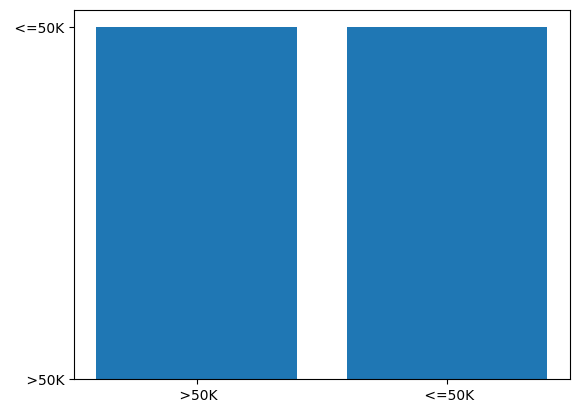

In [212]:
plt.bar(y_test, y_pred_test)
plt.show()

# As you can see y_test & y_pred_test is almost the same

**Here, y_test are the true class labels and y_pred are the predicted class labels in the test-set.**

In [203]:
# y_pred_train is predicted from X_train

y_pred_train = gnb.predict(X_train)

y_pred_train

array([' <=50K', ' >50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype='<U6')

**Compare accuracy of y_pred_train and y_train**

In [206]:
print(f'The accuracy between y_pred_train and y_train: {format(accuracy_score(y_pred_train, y_train)*100)}%')

The accuracy between y_pred_train and y_train: 80.8880308880309%


**Confusion Matrix**

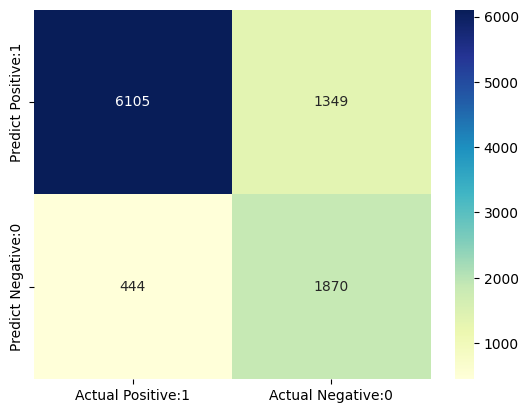

In [222]:
# visualize confusion matrix with seaborn heatmap

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)

cm_matrix = pd.DataFrame(data = cm, columns=['Actual Positive:1', 'Actual Negative:0'], index = ['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot = True, fmt = 'd', cmap = 'YlGnBu')
plt.show()